In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score

In [2]:
dataset = pd.read_csv('fraud_detection_dataset.csv')

In [3]:
dataset.head()

,id,trans_hour,trans_day,trans_month,trans_year,category,upi_number,age,trans_amount,state,fraud_risk
0,0,6,26,1,2022,10,9957000271,32,3096.74,5,1.0
1,1,19,8,1,2022,9,9957000387,63,1556.14,28,0.0
2,2,14,4,4,2022,20,9957000093,32,438.11,19,1.0
3,3,10,16,3,2022,8,9957000966,21,463.77,21,1.0
4,4,7,30,10,2022,10,9957000529,18,4616.89,24,1.0


In [4]:
dataset.shape

(2000, 11)

In [5]:
x = dataset.iloc[:, :10].values
y = dataset.iloc[:, 10].values

In [6]:
from sklearn.model_selection import train_test_split

In [7]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 2)

In [8]:
x_train.shape

(1600, 10)

In [9]:
x_test.shape

(400, 10)

In [10]:
fraud = np.count_nonzero(y_train == 1)
valid = np.count_nonzero(y_train == 0)

In [11]:
print("Fraud cases in training data: ", fraud)
print("Valid cases in training data: ", valid)

Fraud cases in training data:  1314
Valid cases in training data:  286


In [12]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [13]:
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

# LR

In [14]:
from sklearn.linear_model import LogisticRegression
LR_model = LogisticRegression(random_state = 2)
LR_model.fit(x_train, y_train)
y_pred = LR_model.predict(x_test)
acc_lr = accuracy_score(y_test,y_pred)
print(acc_lr)

0.84


# KNN

In [15]:
from sklearn.neighbors import KNeighborsClassifier
KNN_model = KNeighborsClassifier(n_neighbors = 5)
KNN_model.fit(x_train, y_train)
y_pred = KNN_model.predict(x_test)
acc_knn = accuracy_score(y_test,y_pred)
print(acc_knn)

0.82


# SVM

In [16]:
from sklearn.svm import SVC
SVM_model = SVC(kernel = 'linear')
SVM_model.fit(x_train, y_train)
y_pred = SVM_model.predict(x_test)
acc_svm = accuracy_score(y_test,y_pred)
print(acc_svm)

0.84


In [17]:
SVM_model = SVC(gamma = 0.001)
SVM_model.fit(x_train, y_train)
y_pred = SVM_model.predict(x_test)
acc_svm = accuracy_score(y_test,y_pred)
print(acc_svm)

0.84


In [18]:
SVM_model = SVC(C=5)
SVM_model.fit(x_train, y_train)
y_pred = SVM_model.predict(x_test)
acc_svm = accuracy_score(y_test,y_pred)
print(acc_svm)

0.8375


In [19]:
SVM_model = SVC(kernel='rbf')
SVM_model.fit(x_train, y_train)
y_pred = SVM_model.predict(x_test)
acc_svm = accuracy_score(y_test,y_pred)
print(acc_svm)

0.84


# NB

In [20]:
from sklearn.naive_bayes import GaussianNB
NB_model = GaussianNB()
NB_model.fit(x_train, y_train)
y_pred = NB_model.predict(x_test)
acc_nb = accuracy_score(y_test,y_pred)
print(acc_nb)

0.84


# DT

In [21]:
from sklearn.tree import DecisionTreeClassifier
DT_model = DecisionTreeClassifier (criterion = 'entropy')
DT_model.fit(x_train, y_train)
y_pred = DT_model.predict(x_test)
acc_dt = accuracy_score(y_test,y_pred)
print(acc_dt)

0.6725


# RANDOM FOREST (RF)

In [22]:
from sklearn.ensemble import RandomForestClassifier
RF_model = RandomForestClassifier()
RF_model.fit(x_train, y_train)
y_pred = RF_model.predict(x_test)
acc_rf = accuracy_score(y_test,y_pred)
print(acc_rf)

0.8375


# ACCURACY COMPARSION

In [23]:
scores = [
    acc_lr * 100,
    acc_knn * 100,
    acc_svm * 100,
    acc_nb * 100,
    acc_dt * 100,
    acc_rf * 100,
]

In [24]:
names = ["Logistic Regression",
"K-Nearest Neighbors",
"Support Vector Machine",
"Naive Bayes",
"Decision Tree",
"Random Forest"]

In [25]:
df = pd.DataFrame()
df['Algorithm Name'] = names
df ['Accuracy Score (%)'] = scores
df = df. sort_values('Accuracy Score (%)', ascending = False)

In [26]:
df

,Algorithm Name,Accuracy Score (%)
0,Logistic Regression,84.00
2,Support Vector Machine,84.00
3,Naive Bayes,84.00
5,Random Forest,83.75
1,K-Nearest Neighbors,82.00
4,Decision Tree,67.25


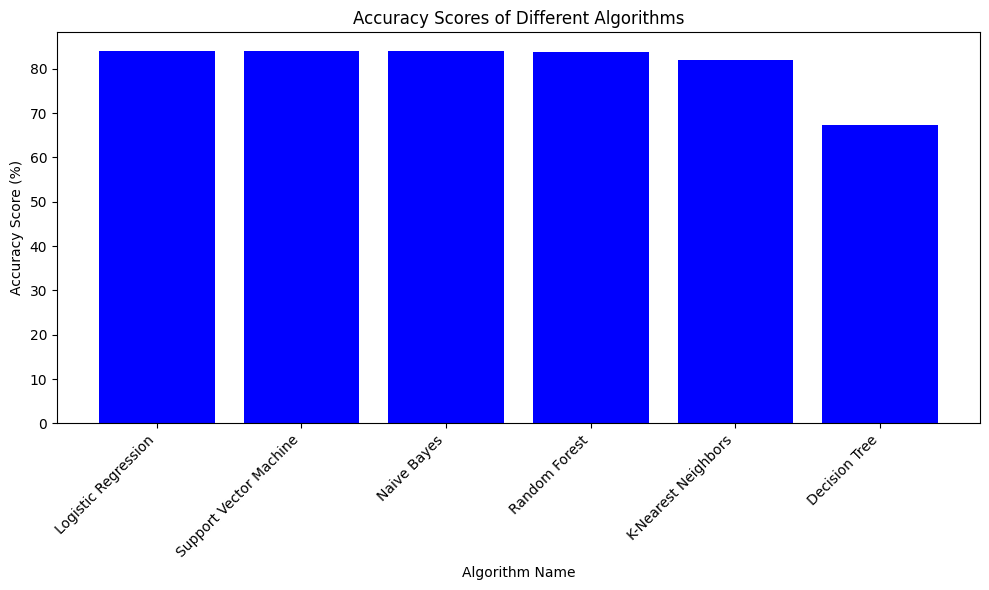

In [27]:
plt.figure(figsize=(10, 6))
plt.bar(df['Algorithm Name'], df['Accuracy Score (%)'], color='blue')
plt.xlabel('Algorithm Name')
plt.ylabel('Accuracy Score (%)')
plt.title('Accuracy Scores of Different Algorithms')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
plt.tight_layout()  # Adjust layout to prevent clipping of labels
plt.show()